In [583]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [584]:
def autolabelint(ax,rects,fsize,col):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()/2 ,
            rect.get_height(),
            '%d' % int(rect.get_height()),
            ha='center',
            va='bottom',
            fontweight='bold',
            color = col,
            fontsize = ((fsize[1]+fsize[0])/2) + 5
           )

In [585]:
path = os.path.abspath(os.getcwd())

Se carga el test y el train usando el path relativo.

In [586]:
train = pd.read_csv(path + '/train.csv', low_memory=False)
test = pd.read_csv(path + '/test.csv', low_memory=False)

In [587]:
train.shape , test.shape

((7613, 5), (3263, 4))

Una relacion de datos de 2,33 a 1 entre el train y el test.

In [588]:
train.shape[0]/test.shape[0]
###### una relacion de datos de casi 2 y medio a 1

2.3331290223720504

Entendiendo los datos.

In [589]:
train.columns, test.columns

(Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object'),
 Index(['id', 'keyword', 'location', 'text'], dtype='object'))

In [590]:
train.dtypes ,  test.dtypes

(id           int64
 keyword     object
 location    object
 text        object
 target       int64
 dtype: object,
 id           int64
 keyword     object
 location    object
 text        object
 dtype: object)

In [591]:
train['target'][0:3]

0    1
1    1
2    1
Name: target, dtype: int64

In [592]:
train['target'].isna().any()

False

In [593]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [594]:
test['target'] = 2

In [595]:
totaldata = pd.concat([train,test])

In [596]:
totaldata.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

Hay campos nulos en los keywords y las locaciones.

In [597]:
totaldata['location'].isna().value_counts() , train['location'].isna().value_counts()

(False    7238
 True     3638
 Name: location, dtype: int64,
 False    5080
 True     2533
 Name: location, dtype: int64)

Hay muy pocos Nans en las Keywords.

In [598]:
totaldata['keyword'].isna().value_counts() , train['keyword'].isna().value_counts()

(False    10789
 True        87
 Name: keyword, dtype: int64,
 False    7552
 True       61
 Name: keyword, dtype: int64)

Los ids se basan en numeraciones simples

In [599]:
totaldata['id'][0:10] , totaldata['id'].max() , totaldata['id'].min()

(0     1
 1     4
 2     5
 3     6
 4     7
 5     8
 6    10
 7    13
 8    14
 9    15
 Name: id, dtype: int64,
 10875,
 0)

Analisis de los tweets

In [600]:
totaldata['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [601]:
s = totaldata['text'][1]

In [602]:
dict((charac,str(s).count(charac)) for charac in str(s))

{'1': 2,
 ' ': 34,
 'F': 1,
 'o': 4,
 'r': 6,
 'e': 14,
 's': 5,
 't': 9,
 'f': 3,
 'i': 5,
 'n': 4,
 'a': 11,
 'L': 1,
 'R': 1,
 'g': 1,
 'S': 1,
 'k': 2,
 '.': 4,
 'C': 1,
 'd': 4,
 '\n': 2,
 'H': 1,
 'b': 2,
 'u': 2,
 '#': 1,
 'h': 1,
 'q': 1,
 'c': 2,
 ',': 2,
 'N': 1,
 'm': 1,
 ':': 2,
 'x': 1,
 'y': 1,
 'p': 1,
 'j': 1}

In [603]:
strain = train['text'].str.cat()

In [604]:
tfalse = train.loc[train['target'] == 0]
ttrue = train.loc[train['target'] == 1]

In [605]:
stfalse = tfalse['text'].str.cat()
sttrue = ttrue['text'].str.cat()

In [606]:
asciiall = ' !"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~'

In [607]:
chart = pd.DataFrame((char,sttrue.count(char)) for char in asciiall).set_index(0).transpose()

In [608]:
charf = pd.DataFrame((char,stfalse.count(char)) for char in asciiall).set_index(0).transpose()

In [609]:
charf

,,!,"""",#,$,%,&,',(,),...,u,v,w,x,y,z,{,|,},~
1,59589,843,0,1700,32,19,293,2063,207,229,...,8906,3086,5208,992,6535,830,1,99,2,17


In [610]:
chart

,,!,"""",#,$,%,&,',(,),...,u,v,w,x,y,z,{,|,},~
1,46452,330,0,1703,12,27,164,1094,142,144,...,6629,2768,3754,885,4167,686,2,53,2,20


In [611]:
charf = charf.transpose().reset_index()
chart = chart.transpose().reset_index()

In [612]:
charf.columns = ['char','cant']
chart.columns = ['char','cant']

Se filtran los caracteres con pocas ocurrencias

In [613]:
charf['cant'].mean()/100

43.56031578947369

In [614]:
charf = charf.loc[charf['cant']>(charf['cant'].mean()/100)]

In [615]:
chart = chart.loc[chart['cant']>(chart['cant'].mean()/100)]

In [616]:
charf

,char,cant
0,,59589
1,!,843
3,#,1700
6,&,293
7,',2063
...,...,...
87,w,5208
88,x,992
89,y,6535
90,z,830


In [617]:
chart

,char,cant
0,,46452
1,!,330
3,#,1703
6,&,164
7,',1094
...,...,...
87,w,3754
88,x,885
89,y,4167
90,z,686


In [618]:
caracteres = charf.merge(chart, on='char',how='left').fillna(0)

In [619]:
caracteres.columns = ['char','cantf','cantt']

In [620]:
caracteres.head(10)

,char,cantf,cantt
0,,59589,46452.0
1,!,843,330.0
2,#,1700,1703.0
3,&,293,164.0
4,',2063,1094.0
5,(,207,142.0
6,),229,144.0
7,*,121,58.0
8,+,57,0.0
9,-,810,943.0


Cantidad de tweets Verdaderos VS Falsos

In [621]:
ttrue.shape[0],tfalse.shape[0]

(3271, 4342)

In [622]:
toy1 = ttrue.shape[0],tfalse.shape[0]
tox = ['Verdaderos', 'Falsos']

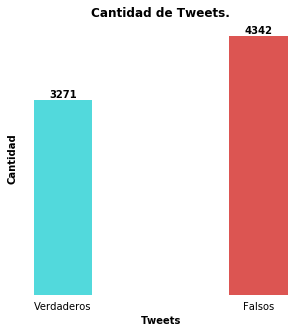

In [623]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
clrs = [colortrue,colorfalse]
rects = ax.bar(tox,toy1,color=clrs,width=0.3)
ax.set_title('Cantidad de Tweets.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'black')
plt.savefig("cantidadDeTweets.png", dpi=500)

# Analisis de caracteres en los tweets

Cantidad de caracteres totales (sacando los espacios) en tweets verdaderos y falsos

In [624]:
toy = (len(sttrue.replace(' ','')),len(stfalse.replace(' ','')))

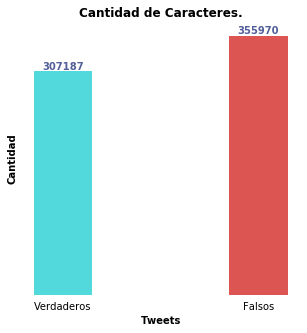

In [625]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
rects = ax.bar(tox,toy,color=clrs,width=0.3)
ax.set_title('Cantidad de Caracteres.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'#535F99')
plt.savefig("cantidadDeCaracteres.png", dpi=500)

Se puede ver que las publicaciones verdaderas usan mayor cantidad de caracteres (sacando los espacios en blanco) que las falsas 

In [626]:
prom = int(int(toy[0])/int(toy1[0])),int(int(toy[1])/int(toy1[1]))
prom

(93, 81)

Hay que tener en cuenta que la cantidad de caracteres a lo largo del tiempo en la red social fue cambiando.

In [627]:
tmaxmin = ttrue['text'].apply(len).max() , ttrue['text'].apply(len).min()
tmaxmin

(151, 14)

In [628]:
ttrue['text'].apply(len)

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64

In [629]:
fmaxmin = tfalse['text'].apply(len).max() , tfalse['text'].apply(len).min()
fmaxmin

(157, 7)

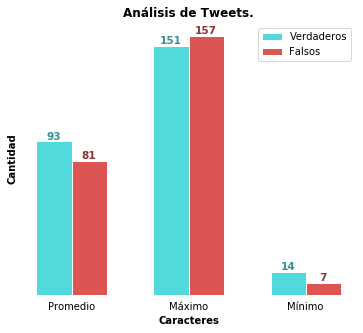

In [630]:
fsize = (6,5)
fig, ax = plt.subplots(figsize=fsize)
bars1 = [prom[0],tmaxmin[0],tmaxmin[1]]
bars2 = [prom[1],fmaxmin[0],fmaxmin[1]]
r1 = np.arange(len(bars1))
r2 = [x + 0.3 for x in r1]
rects1 = ax.bar(r1, bars1, color='#52D9DC', width=0.3, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.3, edgecolor='white', label='Falsos')
ax.set_title('Análisis de Tweets.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_xlabel('Caracteres',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
plt.xlabel('Caracteres', fontweight='bold')
plt.xticks([r+0.15 for r in range(len(bars1))], ['Promedio', 'Máximo', 'Mínimo'])
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
plt.legend()
plt.savefig("analisisDeTweets.png", dpi=500)

In [631]:
ttox = ttrue['text'].apply(len).value_counts().sort_index()

In [632]:
ftox = tfalse['text'].apply(len).value_counts().sort_index()

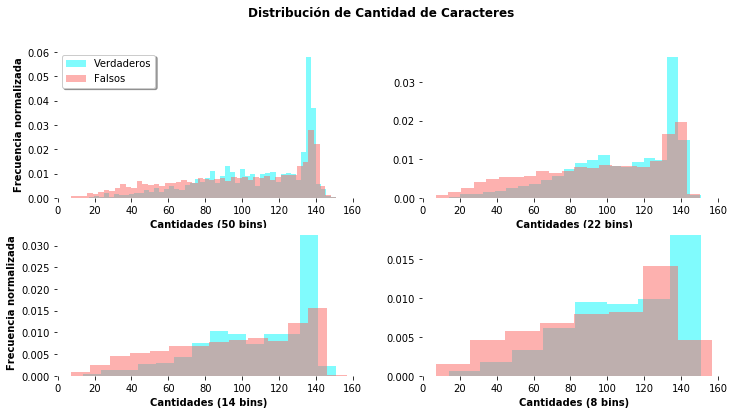

In [633]:
fsize = (12,6)
fig, axs = plt.subplots(2,2,figsize=fsize)
axs[0,0].hist(ttrue['text'].apply(len),alpha=0.8,bins=50, color='#61FAFD', label = 'Verdaderos',density=True)
axs[0,0].hist(tfalse['text'].apply(len),alpha=0.5,bins=50, color='#FD6461', label = 'Falsos',density=True)
axs[0,1].hist(ttrue['text'].apply(len),alpha=0.8,bins=22, color='#61FAFD', label = 'Verdaderos',density=True)
axs[0,1].hist(tfalse['text'].apply(len),alpha=0.5,bins=22, color='#FD6461', label = 'Falsos',density=True)
axs[1,0].hist(ttrue['text'].apply(len),alpha=0.8,bins=14, color='#61FAFD', label = 'Verdaderos',density=True)
axs[1,0].hist(tfalse['text'].apply(len),alpha=0.5,bins=14, color='#FD6461', label = 'Falsos',density=True)
axs[1,1].hist(ttrue['text'].apply(len),alpha=0.8,bins=8, color='#61FAFD', label = 'Verdaderos',density=True)
axs[1,1].hist(tfalse['text'].apply(len),alpha=0.5,bins=8, color='#FD6461', label = 'Falsos',density=True)
legend = axs[0,0].legend(loc='best', shadow=True)
#legend.get_frame().set_facecolor('C0')
#####################################################################################
fig.suptitle('Distribución de Cantidad de Caracteres',fontweight='bold')
axs[0,0].set_ylabel('Frecuencia normalizada',fontweight='bold')
axs[1,0].set_ylabel('Frecuencia normalizada',fontweight='bold')
axs[0,0].set_xlabel('Cantidades (50 bins)',fontweight='bold')
axs[0,1].set_xlabel('Cantidades (22 bins)',fontweight='bold')
axs[1,0].set_xlabel('Cantidades (14 bins)',fontweight='bold')
axs[1,1].set_xlabel('Cantidades (8 bins)',fontweight='bold')
#####################################################################################
ax.xaxis.set_ticks_position('none')
plt.savefig("distribucionDeCantidadesDeCaracteres.png", dpi=500)

In [634]:
asciiletters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
asciinumbers = '0123456789'

In [635]:
total = len(sttrue),len(stfalse)

In [636]:
numberst = pd.DataFrame((char,sttrue.count(char)) for char in asciinumbers).set_index(0)
numbersf = pd.DataFrame((char,stfalse.count(char)) for char in asciinumbers).set_index(0)

In [637]:
lettersf = pd.DataFrame((char,stfalse.count(char)) for char in asciiletters).set_index(0)
letterst = pd.DataFrame((char,sttrue.count(char)) for char in asciiletters).set_index(0)

In [638]:
spacet =  sttrue.count(' ')
spacef =  stfalse.count(' ')

In [639]:
space = (sttrue.count(' ')*100)/total[0], (stfalse.count(' ')*100)/total[1]
letters = (letterst.sum()[1]*100)/total[0],(lettersf.sum()[1]*100)/total[1]
numbers = (numberst.sum()[1]*100)/total[0],(numbersf.sum()[1]*100)/total[1]
nonalfa = 100 - (space[0]+letters[0]+numbers[0]) , 100 - (space[1]+letters[1]+numbers[1])

In [640]:
space , letters , numbers, nonalfa

((13.135429067495384, 14.339480073828264),
 (77.0279861666841, 76.98882709795721),
 (2.439493381668877, 1.661857882996157),
 (7.397091384151636, 7.009834945218358))

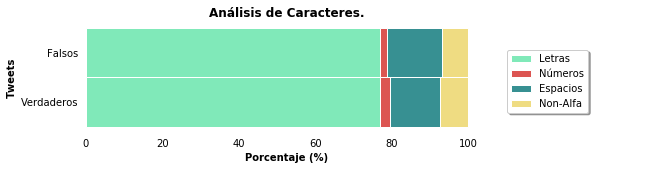

In [759]:
fsize = (9,2)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
barWidth = 1
ax.barh(['Verdaderos','Falsos'], letters, color='#80E9B9', height = barWidth, edgecolor='white', label="Letras")
ax.barh(['Verdaderos','Falsos'], numbers, left=letters, color='#DC5552', height = barWidth, edgecolor='white', label="Números")
ax.barh(['Verdaderos','Falsos'], space, left=[i+j for i,j in zip(letters, numbers)], height = barWidth, color='#379092', edgecolor='white', label="Espacios")
ax.barh(['Verdaderos','Falsos'], nonalfa, left=[i+j+k for i,j,k in zip(letters, numbers, space)], height = barWidth, color='#EFDC82', edgecolor='white', label="Non-Alfa")
ax.set_title('Análisis de Caracteres.',fontweight='bold')
ax.set_xlabel('Porcentaje (%)',fontweight='bold')
ax.set_ylabel('Tweets',fontweight='bold')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
plt.savefig("alfanumericosVsNonalfanumericos.png", dpi=500)

In [642]:
charf15 = charf.sort_values(by='cant',ascending = False)[0:14]
chart15 = chart.sort_values(by='cant',ascending = False)[0:14]

In [643]:
chart15['cant'] = chart15['cant'].apply(lambda x: (x*100)/total[0])
charf15['cant'] = charf15['cant'].apply(lambda x: (x*100)/total[1])

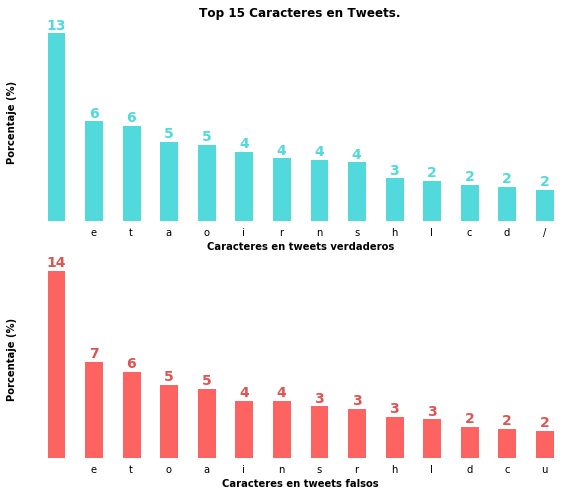

In [644]:
fsize = (10,8)
fig, axs = plt.subplots(2,1,figsize=fsize)
rects1 = axs[0].bar(chart15['char'].tolist(), chart15['cant'].tolist() , color='#52D9DC', width=0.5, edgecolor='white', label='Verdaderos')
rects2 = axs[1].bar(charf15['char'].tolist(), charf15['cant'].tolist() , color='#FD6461', width=0.5, edgecolor='white', label='Falsos')
axs[0].set_title('Top 15 Caracteres en Tweets.',fontweight='bold')
axs[0].set_ylabel('Porcentaje (%)',fontweight='bold')
axs[1].set_xlabel('Caracteres en tweets falsos',fontweight='bold')
axs[0].set_yticks([])
axs[0].xaxis.set_ticks_position('none')
axs[1].set_yticks([])
axs[1].xaxis.set_ticks_position('none')
axs[0].set_xlabel('Caracteres en tweets verdaderos',fontweight='bold')
axs[1].set_ylabel('Porcentaje (%)',fontweight='bold')
autolabelint(axs[0],rects1,fsize,'#52D9DC')
autolabelint(axs[1],rects2,fsize,'#DC5552')
plt.savefig("top15Caracteres.png", dpi=500)

In [761]:
toplot = chart.merge(charf,on='char').sort_values(by='cant_x',ascending=False)[1:20]

In [762]:
toplot.shape

(19, 3)

In [763]:
toplot['cant_x'] = (toplot['cant_x']*100)/total[0]
toplot['cant_y'] = (toplot['cant_y']*100)/total[1]

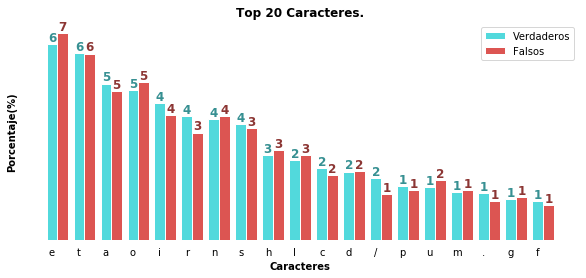

In [764]:
colortrue = '#52D9DC'
colorfalse = '#DC5552'
fsize = (10,4)
fig, ax = plt.subplots(figsize=fsize)
bars1 = toplot['cant_x'].tolist()
bars2 = toplot['cant_y'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.bar(toplot['char'].tolist(), bars1, color='#52D9DC', width=0.4, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.4, edgecolor='white', label='Falsos')
ax.set_title('Top 20 Caracteres.',fontweight='bold')
ax.set_ylabel('Porcentaje(%)',fontweight='bold')
ax.set_xlabel('Caracteres',fontweight='bold')
ax.set_yticks([])
ax.set_xticks(toplot['char'].tolist())
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
#ax.set_xticklabels(toplot['char'].tolist())
plt.legend()
plt.savefig("top20Caracteres.png", dpi=500)

### Conclusion sobre los caracteres:
1. La cantidad de espacios en blanco en los tweets falsos es levemente superior.
2. La distribucion de caracteres muestra que los tweets falsos tienden a ser mas cortos mientras que a partir de cierta cantidad la frecuencia normalizada de verdaderos aumenta y supera a los falsos. (Ver distribucion)

# NLP

In [649]:
import nltk
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [650]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /home/pcsor/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [651]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pcsor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [652]:
from nltk.corpus import stopwords
from nltk.corpus import words

In [653]:
stfalse = tfalse['text'].str.cat(sep=' ')
sttrue = ttrue['text'].str.cat(sep=' ')

In [654]:
###################################################### se guardan los strings procesados

In [655]:
stfalse_file = open("stfalse.txt", "r")
sttrue_file = open("sttrue.txt", "r")

In [656]:
stfalse = stfalse_file.read()
sttrue = sttrue_file.read()

In [657]:
len(stfalse) , len(sttrue)

(419900, 356909)

In [658]:
falsetokens = nltk.wordpunct_tokenize(stfalse)
truetokens = nltk.wordpunct_tokenize(sttrue)

In [659]:
truetokens[1:10]

['Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May']

In [660]:
truetext = nltk.Text(truetokens)
falsetext = nltk.Text(falsetokens)

In [661]:
truetext[20:25]

['.', 'Canada', 'All', 'residents', 'asked']

In [662]:
trashwords = ['https','co','http','t','s']

In [663]:
twords=[word.lower() for word in truetext if ((word.isalpha()) and (word not in trashwords))]
fwords=[word.lower() for word in falsetext if ((word.isalpha()) and (word not in trashwords))]

In [664]:
emotions = ['love','fear','sad','trust','surprise','horror','happy','shame','pity','anger','hate','calm']
conjunctions = ['but','only','unlike','however','rather','yet','nevertheless','wichever','instead']

In [665]:
tvocab = sorted(set(twords))
fvocab = sorted(set(fwords))

In [666]:
tvocab[0:5]

['a', 'aa', 'aaaaaaallll', 'aaaaaand', 'aaarrrgghhh']

In [667]:
truetext = nltk.Text(twords)
falsetext = nltk.Text(fwords)

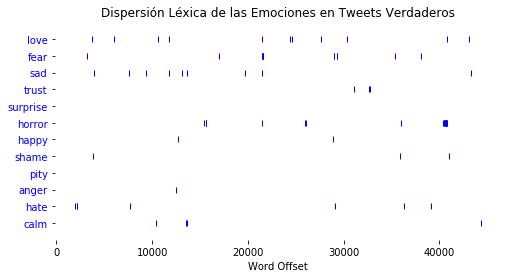

<Figure size 432x288 with 0 Axes>

In [668]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(truetext , emotions ,title = 'Dispersión Léxica de las Emociones en Tweets Verdaderos')
plt.savefig("dispersionLexicaEmocionesVerdaderas.png", dpi=500)

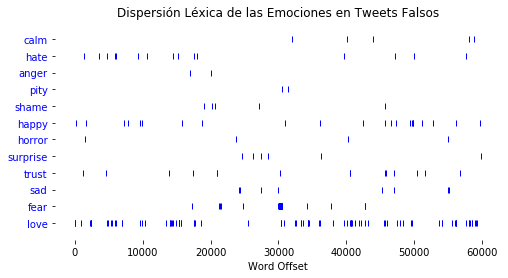

<Figure size 432x288 with 0 Axes>

In [669]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(falsetext , emotions ,title = 'Dispersión Léxica de las Emociones en Tweets Falsos')
plt.savefig("dispersionLexicaEmocionesFalsas.png", dpi=500)

### Spellcheck

In [670]:
def spellcheck(ws,dic):
    temp = set(dic) 
    lst3 = [value for value in ws if value in temp] 
    return lst3 

In [671]:
tpass = spellcheck(twords,words.words())
fpass = spellcheck(fwords,words.words())

In [672]:
toy = (len(tpass)/len(twords))*100 , (len(fpass)/len(fwords))*100

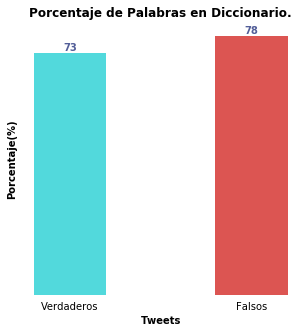

In [673]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
clrs = [colortrue,colorfalse]
rects = ax.bar(['Verdaderos','Falsos'],toy,color=clrs,width=0.4)
ax.set_title('Porcentaje de Palabras en Diccionario.',fontweight='bold')
ax.set_ylabel('Porcentaje(%)',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'#535F99')
plt.savefig("porcentajeDePalabrasEnDiccionario.png", dpi=500)

In [674]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [675]:
train['text'].drop_duplicates()

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7604    #WorldNews Fallen powerlines on G:link tram: U...
7605    on the flip side I'm at Walmart and there is a...
7606    Suicide bomber kills 15 in Saudi security site...
7608    Two giant cranes holding a bridge collapse int...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7503, dtype: object

### Diversidad Lexica

In [676]:
len(tvocab), len(fvocab)

(8731, 11523)

In [677]:
len(truetext), len(falsetext)

(45828, 60355)

In [678]:
len(truetext)/len(tvocab) , len(falsetext)/len(fvocab)

(5.248883289428473, 5.237785298967283)

In [679]:
toy = len(tpass)/len(spellcheck(tvocab,words.words())) , len(fpass)/len(spellcheck(fvocab,words.words()))

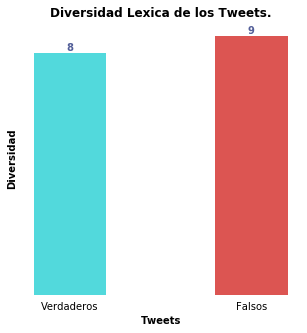

In [680]:
fsize = (5,5)
fig, ax = plt.subplots(figsize=fsize)
clrs = [colortrue,colorfalse]
rects = ax.bar(['Verdaderos','Falsos'],toy,color=clrs,width=0.4)
ax.set_title('Diversidad Lexica de los Tweets.',fontweight='bold')
ax.set_ylabel('Diversidad',fontweight='bold')
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects,fsize,'#535F99')
plt.savefig("diversidadLexicaDeLosTweets.png", dpi=500)

### Tipos de palabras

In [681]:
tpass = nltk.Text(tpass)
fpass = nltk.Text(fpass)

In [682]:
ftagged = pd.DataFrame(nltk.pos_tag(fpass),columns=['word','tag'])
ttagged = pd.DataFrame(nltk.pos_tag(tpass),columns=['word','tag'])

In [683]:
ftaggedpercent = pd.DataFrame((ftagged['tag'].value_counts()[0:20]/ftagged['tag'].count())*100).reset_index()
ttaggedpercent = pd.DataFrame((ttagged['tag'].value_counts()[0:20]/ttagged['tag'].count())*100).reset_index()
types = pd.merge(ttaggedpercent,ftaggedpercent,on='index')
types.columns = ['Tag','true','false']
types['diff'] = types['true'] - types['false']
typeswords = pd.read_csv(path + '/palabras.csv', low_memory=False)
types = pd.merge(types,typeswords,on='Tag')

In [765]:
types.sort_values('diff')[['Tag','Description']]

,Tag,Description
9,PRP,Personal pronoun
6,VBP,"Verb, non-3rd person singular present"
5,VB,"Verb, base form"
4,RB,Adverb
15,PRP$,Possessive pronoun
11,CC,Coordinating conjunction
16,MD,Modal
13,VBZ,"Verb, 3rd person singular present"
10,TO,to
18,WRB,Wh-adverb


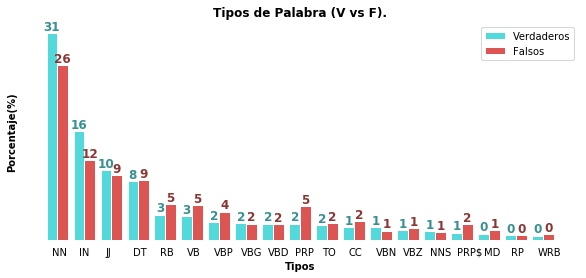

In [685]:
fsize = (10,4)
fig, ax = plt.subplots(figsize=fsize)
bars1 = types['true'].tolist()
bars2 = types['false'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.bar(types['Tag'].tolist(), bars1, color='#52D9DC', width=0.4, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.4, edgecolor='white', label='Falsos')
ax.set_title('Tipos de Palabra (V vs F).',fontweight='bold')
ax.set_ylabel('Porcentaje(%)',fontweight='bold')
ax.set_xlabel('Tipos',fontweight='bold')
ax.set_yticks([])
ax.set_xticks(types['Tag'].tolist())
ax.xaxis.set_ticks_position('none')
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
ax.set_xticklabels(types['Tag'].tolist(),ha='left')
plt.legend()
plt.savefig("tipoDePalabras.png", dpi=500)

### Adverbios (RB)

In [686]:
ftagged['tag'].count(),ttagged['tag'].count()

(47496, 33693)

In [687]:
fadverbs = ((ftagged.loc[ftagged['tag']=='RB']['word'].value_counts())/ftagged['tag'].count())*100
tadverbs = ((ttagged.loc[ttagged['tag']=='RB']['word'].value_counts())/ttagged['tag'].count())*100

In [688]:
fadverbs[0:10]

just      0.492673
so        0.444248
not       0.431615
now       0.309500
still     0.151592
back      0.126326
then      0.126326
here      0.120010
too       0.115799
really    0.115799
Name: word, dtype: float64

In [689]:
tadverbs[0:10]

not             0.278990
just            0.264150
now             0.222598
so              0.192918
still           0.169175
here            0.124655
back            0.077167
conclusively    0.074199
too             0.071231
even            0.065295
Name: word, dtype: float64

In [690]:
tly = pd.Series([w for w in tpass if re.search("ly$", w)]).value_counts()
fly = pd.Series([w for w in fpass if re.search("ly$", w)]).value_counts()

In [691]:
fly.sum()/ftagged['tag'].count()

0.011937847397675594

In [692]:
tly.sum()/ttagged['tag'].count()

0.01127830706674977

### Pronombres Personales

In [693]:
fpronouns = ((ftagged.loc[ftagged['tag']=='PRP']['word'].value_counts())/ftagged['tag'].count())*100
tpronouns = ((ttagged.loc[ttagged['tag']=='PRP']['word'].value_counts())/ttagged['tag'].count())*100

In [694]:
fpronounsP = ((ftagged.loc[ftagged['tag']=='PRP$']['word'].value_counts())/ftagged['tag'].count())*100
tpronounsP = ((ttagged.loc[ttagged['tag']=='PRP$']['word'].value_counts())/ttagged['tag'].count())*100

In [695]:
fpronounsP

my       1.149570
your     0.486357
his      0.206333
her      0.185279
our      0.128432
their    0.122116
its      0.101061
Name: word, dtype: float64

In [696]:
tpronounsP

my        0.397709
your      0.184014
our       0.115751
their     0.106847
its       0.100911
his       0.094975
her       0.092007
hazard    0.002968
Name: word, dtype: float64

In [697]:
fpronouns[0:10]

you     1.593818
it      1.134832
me      0.553731
he      0.389506
we      0.376874
they    0.334765
them    0.172646
us      0.157908
she     0.143170
him     0.098956
Name: word, dtype: float64

In [698]:
tpronouns[0:10]

it      0.712314
you     0.430356
we      0.341317
they    0.213694
me      0.195886
he      0.160271
us      0.145431
them    0.097943
him     0.065295
she     0.050456
Name: word, dtype: float64

In [699]:
tpronouns = tpronouns.reset_index()
fpronouns = fpronouns.reset_index()
tpronounsP = tpronounsP.reset_index()
fpronounsP = fpronounsP.reset_index()

In [700]:
tpron = tpronouns.append(tpronounsP)
fpron = fpronouns.append(fpronounsP)
tpron = tpron.sort_values(by='word',ascending=False)[0:20]
fpron = fpron.sort_values(by='word',ascending=False)[0:20]
pronon = pd.merge(fpron,tpron,on='index')
pronon['diff'] = abs(pronon['word_x'] - pronon['word_y'])
pronon = pronon.sort_values(by='diff',ascending=False)

In [701]:
pronon.drop_duplicates(subset='index', keep="first",inplace=True)

In [702]:
toplot = pronon[0:20]

In [703]:
toplot

,index,word_x,word_y,diff
0,you,1.593818,0.430356,1.163462
1,my,1.149570,0.397709,0.751862
2,it,1.134832,0.712314,0.422518
3,me,0.553731,0.195886,0.357844
4,your,0.486357,0.184014,0.302342
5,he,0.389506,0.160271,0.229236
10,her,0.185279,0.011872,0.173407
7,they,0.334765,0.213694,0.121071
8,his,0.206333,0.094975,0.111358
15,she,0.143170,0.050456,0.092714


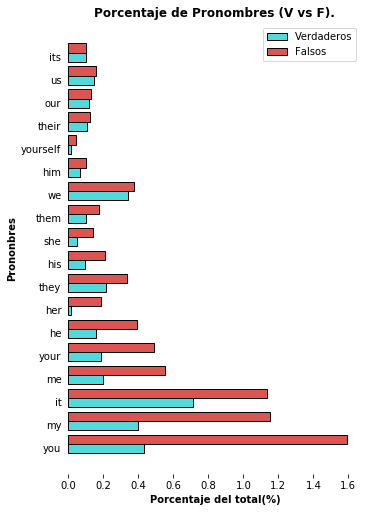

In [704]:
fsize = (5,7)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
bars2 = toplot['word_x'].tolist()
bars1 = toplot['word_y'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.barh(toplot['index'].tolist(), bars1,height=0.4, color='#52D9DC', edgecolor='black', label='Verdaderos')
rects2 = ax.barh(r2, bars2, color='#DC5552',height=0.4, edgecolor='black', label='Falsos')
ax.set_title('Porcentaje de Pronombres (V vs F).',fontweight='bold')
ax.set_ylabel('Prononbres',fontweight='bold')
ax.set_xlabel('Porcentaje del total(%)',fontweight='bold')
ax.set_yticks(toplot['index'].tolist())
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(toplot['index'].tolist(),va='center')
plt.legend()
plt.savefig("porcentajeDePronombres.png", dpi=500)

### Verbos en infinitivo

In [705]:
finverb = ((ftagged.loc[ftagged['tag']=='VB']['word'].value_counts())/ftagged['tag'].count())*100
tinverb = ((ttagged.loc[ttagged['tag']=='VB']['word'].value_counts())/ttagged['tag'].count())*100

In [706]:
finverb[0:10]

be      0.604261
i       0.221071
get     0.218966
have    0.153697
see     0.105272
go      0.101061
let     0.101061
do      0.092639
take    0.080007
make    0.069480
Name: word, dtype: float64

In [707]:
tinverb[0:10]

be          0.359125
get         0.175111
have        0.169175
sue         0.080135
do          0.068263
evacuate    0.062327
help        0.050456
go          0.047488
take        0.044520
know        0.044520
Name: word, dtype: float64

### Adjetivos

In [708]:
fadj = " ".join(ftagged.loc[ftagged['tag']=='JJ']['word'])
tadj = " ".join(ttagged.loc[ttagged['tag']=='JJ']['word'])

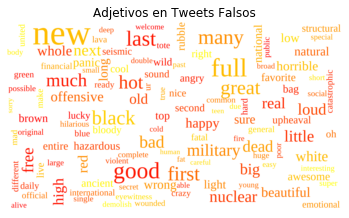

In [709]:
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    stopwords=stopwords.words("english"),
    max_words=120,
    min_font_size=1,
    max_font_size=200, 
    random_state=42,
    width=1920, 
    height=1080,
    colormap='autumn',
    collocations=False
).generate(fadj)

fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(6,6)
plt.axis('off')
plt.title('Adjetivos en Tweets Falsos')
plt.savefig("fadjetivos.png", dpi=500)
plt.show()

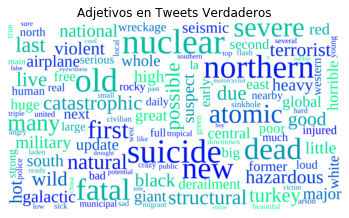

In [710]:
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    stopwords=stopwords.words("english"),
    max_words=120,
    min_font_size=1,
    max_font_size=200, 
    random_state=42,
    width=1920, 
    height=1080,
    colormap='winter',
    collocations=False
).generate(tadj)

fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(6,6)
plt.axis('off')
plt.title('Adjetivos en Tweets Verdaderos')
plt.savefig("tadj.png", dpi=500)
plt.show()

In [711]:
fadj = ((ftagged.loc[ftagged['tag']=='JJ']['word'].value_counts())/ftagged['tag'].count())*100
tadj = ((ttagged.loc[ttagged['tag']=='JJ']['word'].value_counts())/ttagged['tag'].count())*100

### Sustantivos

In [712]:
fnouns = ((ftagged.loc[ftagged['tag']=='NN']['word'].value_counts())/ftagged['tag'].count())*100
tnouns = ((ttagged.loc[ttagged['tag']=='NN']['word'].value_counts())/ttagged['tag'].count())*100

In [713]:
trashwords = ['i','m']
fnouns = fnouns.reset_index()
tnouns = tnouns.reset_index()
fnouns = fnouns.loc[~fnouns['index'].isin(trashwords)]
tnouns = tnouns.loc[~tnouns['index'].isin(trashwords)]

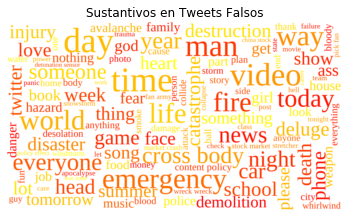

In [714]:
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    stopwords=stopwords.words("english"),
    max_words=120,
    min_font_size=1,
    max_font_size=200, 
    random_state=42,
    width=1920, 
    height=1080,
    colormap='autumn'
).generate(' '.join(ftagged.loc[ftagged['tag'] == 'NN']['word']))

fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(6,6)
plt.axis('off')
plt.title('Sustantivos en Tweets Falsos')
plt.savefig("fsustantivos.png", dpi=500)
plt.show()

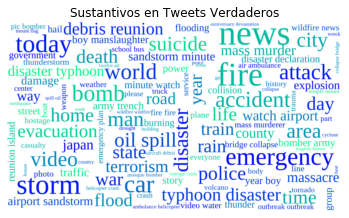

In [715]:
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    stopwords=stopwords.words("english"),
    max_words=120,
    min_font_size=1,
    max_font_size=200, 
    random_state=42,
    width=1920, 
    height=1080,
    colormap='winter'
).generate(' '.join(ttagged.loc[ttagged['tag'] == 'NN']['word']))

fig = plt.figure(1)

plt.imshow(wordcloud,interpolation="bilinear")
fig.set_size_inches(6,6)
plt.axis('off')
plt.title('Sustantivos en Tweets Verdaderos')
plt.savefig("tsustantivos.png", dpi=500)
plt.show()

### Conjunciones Coordinantes

In [716]:
fcoconj = ((ftagged.loc[ftagged['tag']=='CC']['word'].value_counts())/ftagged['tag'].count())*100
tcoconj = ((ttagged.loc[ttagged['tag']=='CC']['word'].value_counts())/ttagged['tag'].count())*100

In [717]:
trashwords =['lamp','satchel' , 'mayhem' , 'knife', 'monogram' , 'n','leprosy','yeah']

In [718]:
fcoconj = fcoconj.reset_index()
tcoconj = tcoconj.reset_index()
fcoconj = fcoconj.loc[~fcoconj['index'].isin(trashwords)]
tcoconj = tcoconj.loc[~tcoconj['index'].isin(trashwords)]

In [719]:
tcoconj[0:3]

,index,word
0,and,1.501796
1,but,0.287894
2,or,0.148399


In [720]:
fcoconj[0:3]

,index,word
0,and,1.937005
1,but,0.475830
2,or,0.328449


In [721]:
adconjunctions = ['but', 'still', 'yet', 'while']

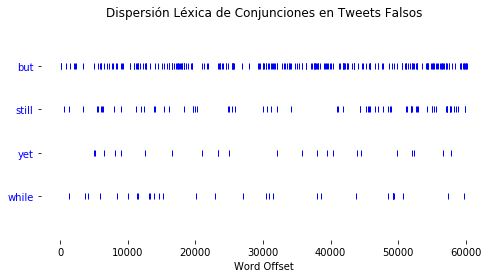

<Figure size 432x288 with 0 Axes>

In [722]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(falsetext , adconjunctions ,title = 'Dispersión Léxica de Conjunciones en Tweets Falsos')
plt.savefig("despersionLexicaConjuncionesCorFalsas.png", dpi=500)

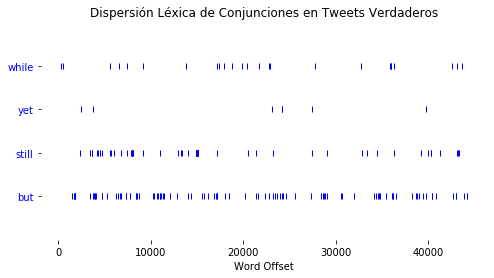

<Figure size 432x288 with 0 Axes>

In [723]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(truetext , adconjunctions ,title = 'Dispersión Léxica de Conjunciones en Tweets Verdaderos')
plt.savefig("dispersionLexicaConjuncionesCorVerdaderas.png", dpi=500)

### Conjunciones subordinantes

In [724]:
fsuconj = ((ftagged.loc[ftagged['tag']=='IN']['word'].value_counts())/ftagged['tag'].count())*100
tsuconj = ((ttagged.loc[ttagged['tag']=='IN']['word'].value_counts())/ttagged['tag'].count())*100

In [725]:
fsuconj[0:20]

of         1.899107
in         1.730672
for        1.037982
on         0.926394
with       0.800067
by         0.524255
like       0.505306
at         0.492673
that       0.454775
if         0.387401
from       0.372663
as         0.294762
about      0.277918
via        0.208439
into       0.202122
after      0.164224
out        0.143170
than       0.113694
over       0.109483
because    0.105272
Name: word, dtype: float64

In [726]:
tsuconj[0:20]

in       3.454724
of       2.754281
on       1.246550
for      1.190158
at       0.914136
by       0.825097
from     0.727154
with     0.569851
after    0.537204
as       0.439260
via      0.359125
over     0.350221
that     0.305701
like     0.258214
than     0.252278
into     0.231502
about    0.219630
if       0.172143
near     0.136527
under    0.124655
Name: word, dtype: float64

In [727]:
suconjunctions=['if','even','than','because']

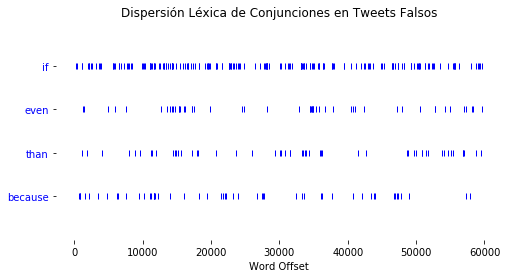

<Figure size 432x288 with 0 Axes>

In [728]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(falsetext , suconjunctions ,title = 'Dispersión Léxica de Conjunciones en Tweets Falsos')
plt.savefig("despersionLexicaConjuncionesSubFalsas.png", dpi=500)

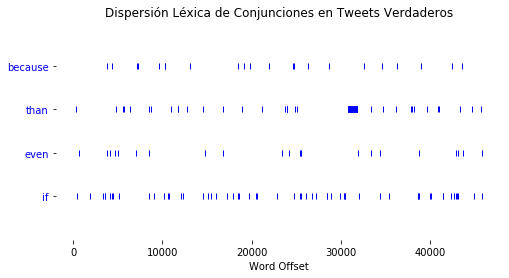

<Figure size 432x288 with 0 Axes>

In [729]:
fsize = (8,4)
fig, ax = plt.subplots(figsize=fsize)
nltk.draw.dispersion.dispersion_plot(truetext , suconjunctions ,title = 'Dispersión Léxica de Conjunciones en Tweets Verdaderos')
plt.savefig("despersionLexicaConjuncionesSubVerdaderas.png", dpi=500)

In [730]:
fsuconj = fsuconj.reset_index()
tsuconj = tsuconj.reset_index()

In [731]:
prepositions = ['cerca','about','below','off','toward','above','beneath','for','on','under','across','beside','from','onto','underneath','after','between','in','out','until','against','beyond','outside','up','along','inside','over','upon',',among','by','into','around','concerning','with','at','despite','since','near','with','in','down','through','without','during','behind','of','to']

In [732]:
fsucon = fsuconj.loc[~fsuconj['index'].isin(prepositions)]
tsucon = tsuconj.loc[~tsuconj['index'].isin(prepositions)]

In [733]:
tconj = tsucon.append(tcoconj)
fconj = fsucon.append(fcoconj)
tconj = tconj.sort_values(by='word',ascending=False)[0:20]
fconj = fconj.sort_values(by='word',ascending=False)[0:20]
conjun = pd.merge(fconj,tconj,on='index')
conjun['diff'] = abs(conjun['word_x'] - conjun['word_y'])
conjun = conjun.sort_values(by='diff',ascending=False)

In [734]:
conjun['diff'] = abs(conjun['word_x'] - conjun['word_y'])
conjun = conjun.sort_values(by='diff',ascending=False)

In [735]:
toplot = conjun[0:12]

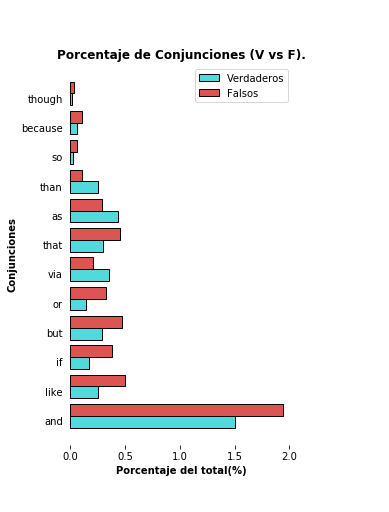

In [736]:
fsize = (5,7)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
bars2 = toplot['word_x'].tolist()
bars1 = toplot['word_y'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.barh(toplot['index'].tolist(), bars1,height=0.4, color='#52D9DC', edgecolor='black', label='Verdaderos')
rects2 = ax.barh(r2, bars2, color='#DC5552',height=0.4, edgecolor='black', label='Falsos')
ax.set_title('Porcentaje de Conjunciones (V vs F).',fontweight='bold')
ax.set_ylabel('Conjunciones',fontweight='bold')
ax.set_xlabel('Porcentaje del total(%)',fontweight='bold')
ax.set_yticks(toplot['index'].tolist())
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(toplot['index'].tolist(),va='center')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
plt.legend()
plt.savefig("porcentajeDeConjunciones.png", dpi=500)

### Preposiciones

In [740]:
fsuconj = fsuconj.loc[fsuconj['index'].isin(prepositions)]
tsuconj = tsuconj.loc[tsuconj['index'].isin(prepositions)]

In [741]:
toplot = pd.merge(fsuconj,tsuconj,on='index')

In [742]:
toplot.columns

Index(['index', 'word_x', 'word_y'], dtype='object')

In [743]:
toplot['diff'] = abs(toplot['word_x'] - toplot['word_y'])
toplot = toplot.sort_values(by='diff',ascending=False)

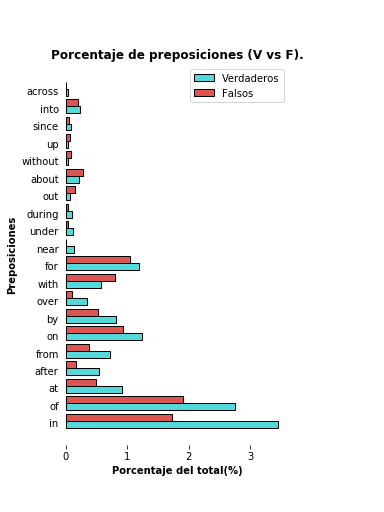

In [744]:
fsize = (5,7)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
toplot=toplot[0:20]
bars2 = toplot['word_x'].tolist()
bars1 = toplot['word_y'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.barh(toplot['index'].tolist(), bars1,height=0.4, color='#52D9DC', edgecolor='black', label='Verdaderos')
rects2 = ax.barh(r2, bars2, color='#DC5552',height=0.4, edgecolor='black', label='Falsos')
ax.set_title('Porcentaje de preposiciones (V vs F).',fontweight='bold')
ax.set_ylabel('Preposiciones',fontweight='bold')
ax.set_xlabel('Porcentaje del total(%)',fontweight='bold')
ax.set_yticks(toplot['index'].tolist())
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(toplot['index'].tolist(),va='center')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
plt.legend()
plt.savefig("porcentajeDePreposiciones.png", dpi=500)

### Verbos

In [745]:
fverbs = ((ftagged.loc[ftagged['tag']=='VBP']['word'].value_counts())/ftagged['tag'].count())*100
tverbs = ((ttagged.loc[ttagged['tag']=='VBP']['word'].value_counts())/ttagged['tag'].count())*100

In [746]:
fverbs[0:10]

are     0.498989
have    0.355819
m       0.275813
re      0.174752
i       0.166330
do      0.164224
know    0.120010
want    0.117905
am      0.105272
don     0.098956
Name: word, dtype: float64

In [747]:
tverbs[0:10]

are      0.495652
have     0.249310
re       0.127623
m        0.092007
say      0.077167
am       0.062327
don      0.062327
do       0.053424
i        0.047488
think    0.041552
Name: word, dtype: float64

### Longitud de palabras en tweets verdaderos vs falsos

In [748]:
len(twords),len(fwords)

(45828, 60355)

In [749]:
pd.Series(twords).apply(len).mean()

5.108972680457362

In [750]:
pd.Series(fwords).apply(len).mean()

4.68971916162704

### Palabras mas camunes verdaderos vs falsos

In [751]:
stfalse = re.sub(r'[^\w]', ' ', stfalse) ##### saco todo lo que no sea alfanumerico
stfalse = stfalse.replace('http',' ') ###### remuevo los espacios en blanco de mas
stfalse = stfalse.lower() ###### lo paso a minuscula
stfalse = re.sub(r'\b\w{1,3}\b', ' ', stfalse) ###### remuevo las palabras cortas
stfalse = re.sub(' +',' ',stfalse) ###### remuevo los espacios en blanco de mas
sttrue = re.sub(r'[^\w]', ' ', sttrue) ##### saco todo lo que no sea alfanumerico
sttrue = sttrue.replace('http',' ') ###### remuevo los espacios en blanco de mas
sttrue = sttrue.lower() ###### lo paso a minuscula
sttrue = re.sub(r'\b\w{1,3}\b', ' ', sttrue) ###### remuevo las palabras cortas
sttrue = re.sub(' +',' ',sttrue) ###### remuevo los espacios en blanco de mas

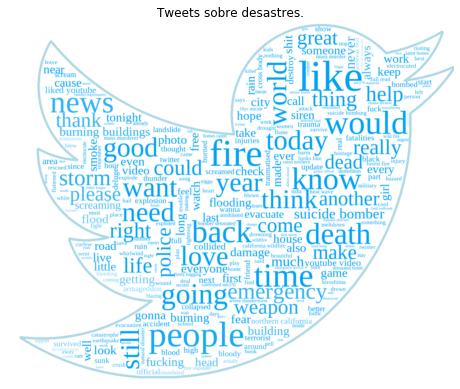

In [767]:
mascara = np.array(Image.open(path + '/twitter.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    mask=mascara,
    stopwords=stopwords.words("english"),
    max_words=300,
    min_font_size=5,
    max_font_size=130, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=10,
    contour_color='lightblue'
).generate(sttrue+stfalse)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
fig.set_size_inches(8,10)
plt.axis('off')
plt.title('Tweets sobre desastres.')
plt.savefig("wtwitter.png", dpi=500)
plt.show()

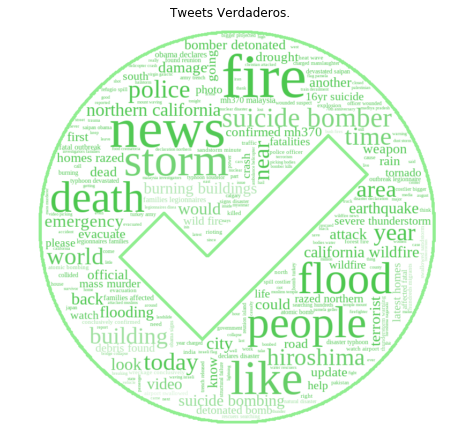

In [770]:
mascara = np.array(Image.open(path + '/verdadero.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    mask=mascara,
    stopwords=stopwords.words("english"),
    max_words=250,
    min_font_size=5,
    max_font_size=115, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=8,
    contour_color='lightgreen'
).generate(sttrue)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
fig.set_size_inches(8,10)
plt.axis('off')
plt.savefig("wverdadero.png", dpi=500)
plt.title('Tweets Verdaderos.')
plt.show()

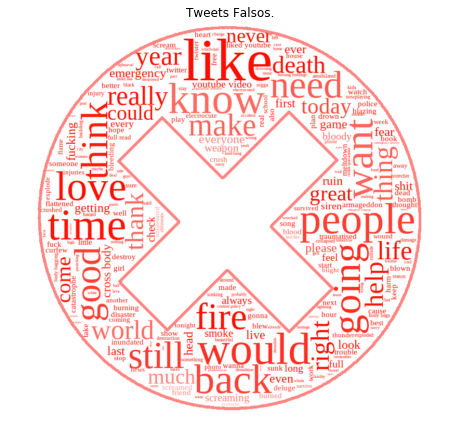

In [771]:
mascara = np.array(Image.open(path + '/falso.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
    font_path = '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
    mask=mascara,
    stopwords=stopwords.words('english'),
    max_words=250,
    min_font_size=5,
    max_font_size=115, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=8,
    contour_color='#FF8582'
).generate(stfalse)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)

plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
fig.set_size_inches(8,10)
plt.axis('off')
plt.savefig("wfalso.png", dpi=500)
plt.title('Tweets Falsos.')
plt.show()

# Locations

In [798]:
locations = train[~train['location'].isna()]

In [799]:
tlocations = ttrue[~ttrue['location'].isna()]
flocations = tfalse[~tfalse['location'].isna()]

In [807]:
tlocations = tlocations['location'].value_counts().reset_index()
flocations = flocations['location'].value_counts().reset_index()

In [813]:
toplot = pd.merge(tlocations,flocations,on='index')[0:30]

In [814]:
toplot[0:3]

,index,location_x,location_y
0,USA,67,37
1,United States,27,23
2,Nigeria,22,6


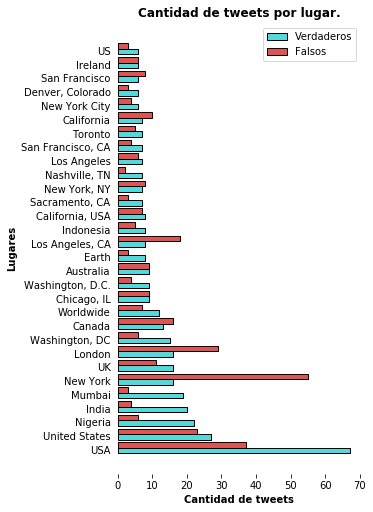

In [816]:
fsize = (5,7)
fig, ax = plt.subplots(figsize=fsize,constrained_layout=True)
bars2 = toplot['location_y'].tolist()
bars1 = toplot['location_x'].tolist()
r1 = np.arange(len(bars1))
r2 = [x + 0.4 for x in r1]
rects1 = ax.barh(toplot['index'].tolist(), bars1,height=0.4, color='#52D9DC', edgecolor='black', label='Verdaderos')
rects2 = ax.barh(r2, bars2, color='#DC5552',height=0.4, edgecolor='black', label='Falsos')
ax.set_title('Cantidad de tweets por lugar.',fontweight='bold')
ax.set_ylabel('Lugares',fontweight='bold')
ax.set_xlabel('Cantidad de tweets',fontweight='bold')
ax.set_yticks(toplot['index'].tolist())
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(toplot['index'].tolist(),va='center')
plt.legend()
plt.savefig("cantidadDeTweetsSegunLugar.png", dpi=500)

# Menciones, etiquetas y enlaces

In [821]:
cantidades = pd.read_csv('menciones.csv',low_memory=False)

In [823]:
cantidades

,target,Menciones,Etiquetas,Enlaces
0,1,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
7608,1,0,0,1
7609,1,1,0,0
7610,1,0,0,1
7611,1,0,0,0


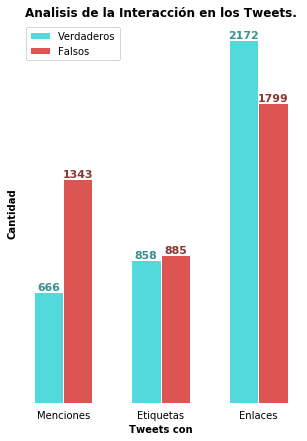

In [827]:
fsize = (5,7)
fig, ax = plt.subplots(figsize=fsize)
false = cantidades.loc[cantidades["target"] == 0]
true = cantidades.loc[cantidades["target"] == 1]
bars1 = [true["Menciones"].sum(),true["Etiquetas"].sum(),true["Enlaces"].sum()]
bars2 = [false["Menciones"].sum(),false["Etiquetas"].sum(),false["Enlaces"].sum()]
r1 = np.arange(len(bars1))
r2 = [x + 0.3 for x in r1]
rects1 = ax.bar(r1, bars1, color='#52D9DC', width=0.3, edgecolor='white', label='Verdaderos')
rects2 = ax.bar(r2, bars2, color='#DC5552', width=0.3, edgecolor='white', label='Falsos')

ax.set_title('Analisis de la Interacción en los Tweets.',fontweight='bold')
ax.set_ylabel('Cantidad',fontweight='bold')
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
plt.xlabel('Tweets con', fontweight='bold')
plt.xticks([r+0.15 for r in range(len(bars1))], ['Menciones', 'Etiquetas', 'Enlaces'])
autolabelint(ax,rects1,fsize,'#379092')
autolabelint(ax,rects2,fsize,'#8C3634')
plt.legend()
plt.savefig("cantidadesMencionesEnlacesEtiquetas.png", dpi=500)

In [830]:
train.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64